# 项目：用线性回归预测房价数据

## 分析目标

此数据分析报告的目的是，基于已有的房屋销售价格，以及有关该房屋的属性，进行线性回归分析，从而利用得到的线性回归模型，能对以下未知售价的房屋根据属性进行价格预测：  

面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。

## 简介

数据集`house_price.csv`记录了超过五百栋房屋的交易价格，以及房屋的相关属性信息，包括房屋面积、卧室数、厕所数、楼层数、是否位于主路、是否有客房，等等。

`house_price.csv`每列的含义如下：  

- Price: The price of the house.
- Area: The total area of the house in square feet.
- Bedrooms: The number of bedrooms in the house.
- Bathrooms: The number of bathrooms in the house.
- Stories: The number of stories in the house.
- Mainroad: Whether the house is connected to the main road (Yes/No).
- Guestroom: Whether the house has a guest room (Yes/No).
- Basement: Whether the house has a basement (Yes/No).
- Hot water heating: Whether the house has a hot water heating system (Yes/No).
- Airconditioning: Whether the house has an air conditioning system (Yes/No).
- Parking: The number of parking spaces available within the house.
- Prefarea: Whether the house is located in a preferred area (Yes/No).
- Furnishing status: The furnishing status of the house (Fully Furnished, Semi-Furnished, Unfurnished).

## 读取数据

导入数据分析所需要的库，使用`pandas`库里的`read_csv`函数，解析原始文件`house_price.csv`为Dataframe并赋值给`original_data`变量.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_house_price = pd.read_csv('./house_price.csv')
original_house_price.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## 评估和清洗数据

在这一部分中，我们将对在上一部分建立的`original_data`DataFrame所包含的数据进行评估和清理。  

主要从两个方面进行：结构和内容，即整齐度和干净度。
数据的结构性问题指不符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”这三个标准；数据的内容性问题包括存在丢失数据、重复数据、无效数据等。
为了区分开经过清理的数据和原始的数据，我们创建新的变量`cleaned_data`，让它为`original_data`复制出的副本.我们之后的清理步骤都将被运用在`cleaned_data`。

In [3]:
cleaned_house_price = original_house_price.copy()

### 数据整齐度

In [4]:
cleaned_house_price.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
387,3500000,4240,3,1,2,yes,no,no,no,yes,0,no,semi-furnished
342,3850000,7152,3,1,2,yes,no,no,no,yes,0,no,furnished
381,3605000,4000,2,1,1,yes,no,no,no,no,0,yes,semi-furnished
522,2380000,2475,3,1,2,yes,no,no,no,no,0,no,furnished
463,3080000,3090,2,1,1,yes,yes,yes,no,no,0,no,unfurnished
101,6230000,5500,3,1,3,yes,no,no,no,no,1,yes,unfurnished
386,3535000,3850,3,1,1,yes,no,no,no,no,2,no,unfurnished
26,8463000,6000,3,2,4,yes,yes,yes,no,yes,0,yes,semi-furnished
252,4515000,9860,3,1,1,yes,no,no,no,no,0,no,semi-furnished
456,3118850,2398,3,1,1,yes,no,no,no,no,0,yes,semi-furnished


根据数据的抽样可以看出，数据满足“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”这三个标准，所以数据不存在结构性问题。

### 数据干净度

先用`info`方法对数据做一个大致的了解。

In [5]:
cleaned_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


#### 评估并处理缺失数据

根据以上信息可以看出并无缺失数据。

#### 评估并处理重复数据

In [6]:
sum(cleaned_house_price.duplicated())

0

可以得知并无重复数据。

#### 评估并处理不一致数据

经过分析，认为不一致数据只会存在于`furnishingstatus`的取值。筛选数据进行观察。

In [7]:
cleaned_house_price["furnishingstatus"].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

经过观察，可以判定并无不一致数据。

#### 评估并处理无效或错误数据

In [8]:
cleaned_house_price.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


经过分析，不存在无效或错误数据。

## 探索数据

在着手推断统计学分析之前，我们可以先借助数据可视化，探索数值变量的分布，以及与房价存在相关性的变量，为后续的进一步分析提供方向。

In [9]:
# 设置图表色盘尾“pastel”
sns.set_palette("pastel")

### 房价分布

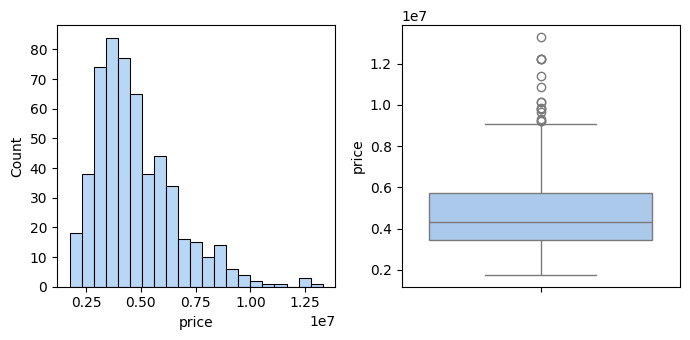

In [10]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
figure, axes = plt.subplots(1,2)
sns.histplot(cleaned_house_price, x='price', ax=axes[0])
sns.boxplot(cleaned_house_price, y='price', ax=axes[1])
plt.show()

从以上的图表可以看出房价呈右偏态分布，说明数据集中的大多数房子价格中等，但有异常值，拉高了平均值。

### 面积分布

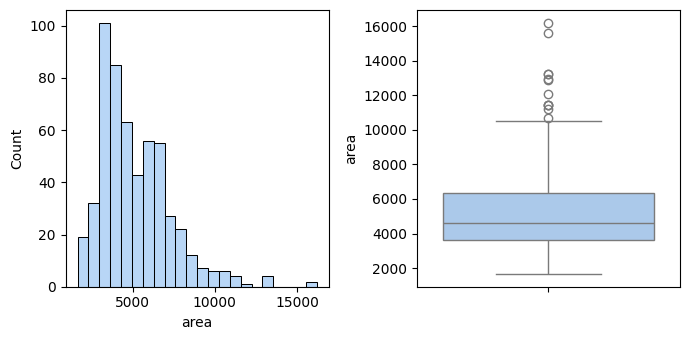

In [11]:
figure, axes = plt.subplots(1,2)
sns.histplot(cleaned_house_price['area'], ax=axes[0])
sns.boxplot(cleaned_house_price['area'], ax=axes[1])
plt.show()

面积的分布与房价的分布类似，也呈现右偏态分布。

### 房价与面积的关系

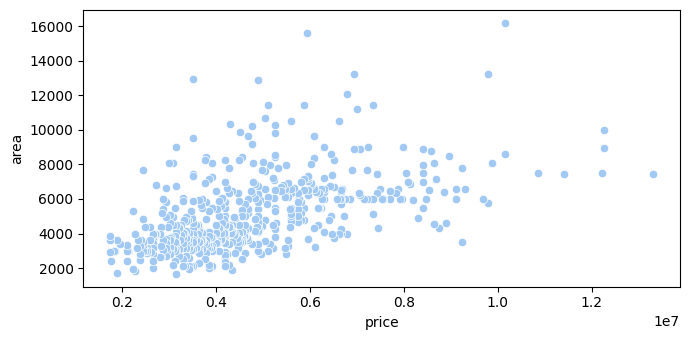

In [12]:
sns.scatterplot(cleaned_house_price, x='price', y='area')
plt.show()

从散点图可以看出大致呈正相关的关系，但相关性的强度需要根据后续计算才能得到。

### 卧室数与房价的关系

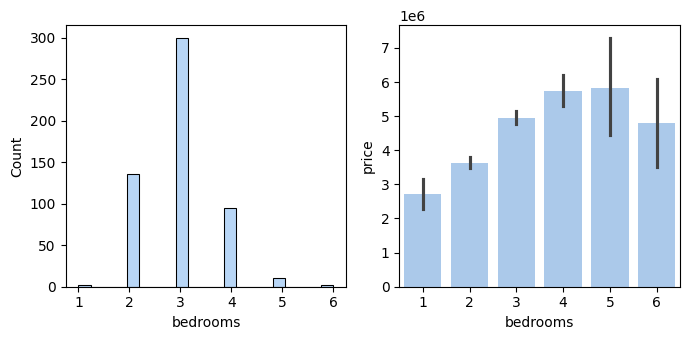

In [13]:
fig, ax = plt.subplots(1,2)
sns.histplot(cleaned_house_price, x='bedrooms', ax=ax[0])
sns.barplot(cleaned_house_price, x='bedrooms', y='price', ax=ax[1])
plt.show()

可以看出数据集中房子的卧室数有1-6个，其中大多数房子有2-4个。  

同时可以看出有,当卧室数小于5时，卧室数越多，房价越高。当卧室数大于5时就不一定呈这样的趋势。

### 浴室数与房价的关系

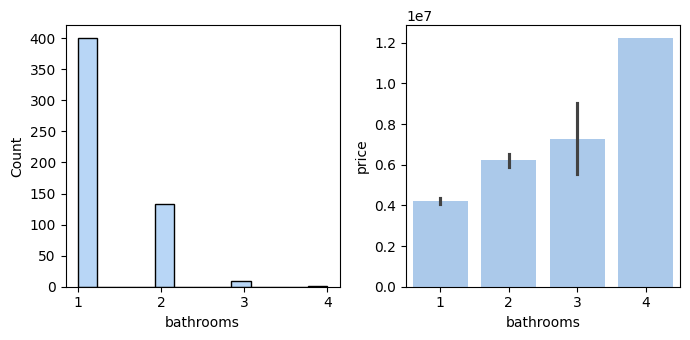

In [14]:
fig, ax = plt.subplots(1,2)
sns.histplot(cleaned_house_price, x='bathrooms', ax=ax[0])
sns.barplot(cleaned_house_price, x='bathrooms', y='price', ax=ax[1])
plt.show()

从图表可以看出，数据集中的房子的浴室数范围在1-4个，大多数房子有1-2个浴室。  

同时可以看出，浴室越多，房价越高。

### 楼层数与房价的关系

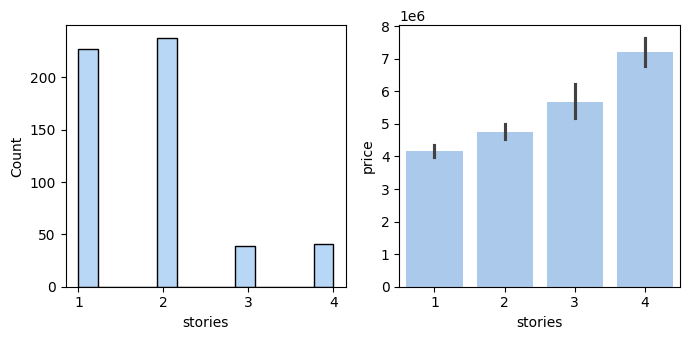

In [15]:
fig, ax = plt.subplots(1,2)
sns.histplot(cleaned_house_price, x='stories', ax=ax[0])
sns.barplot(cleaned_house_price, x='stories', y='price', ax=ax[1])
plt.show()

从图表可以看出，数据集中的房子的楼层数范围在1-4个，大多数房子有1-2层。  

同时可以看出，楼层数越多，房价越高。

### 车库数与房价的关系

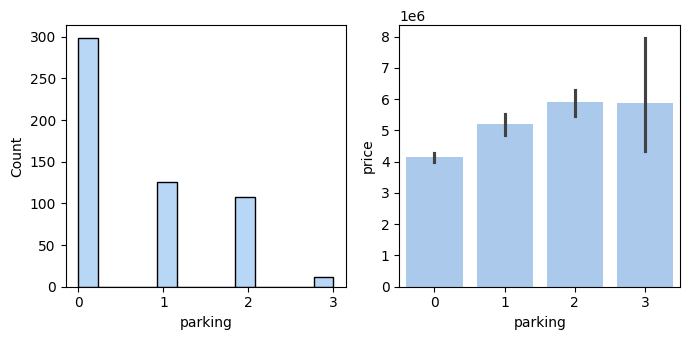

In [16]:
fig, ax = plt.subplots(1,2)
sns.histplot(cleaned_house_price, x='parking', ax=ax[0])
sns.barplot(cleaned_house_price, x='parking', y='price', ax=ax[1])
plt.show()

从图表可以看出，数据集中的房子的楼车库数范围在1-3个，大多数房子有0-2个车库。  

从平均房价与车库数的柱状图可以看出，车库数越多房价越高，但当车库超过2个后，房价不一定相应更高。

### 是否位于主路与房价的关系

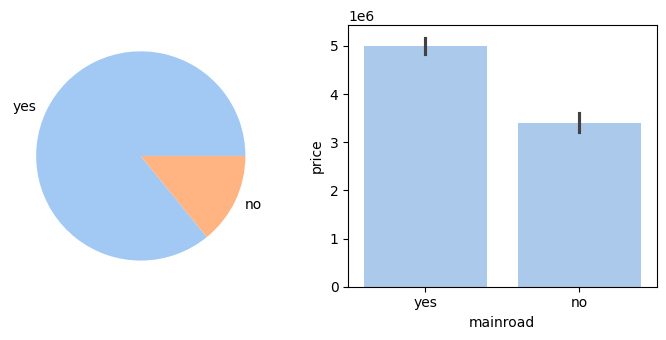

In [17]:
fig, ax = fig, ax = plt.subplots(1,2)
mainroad_count = cleaned_house_price['mainroad'].value_counts()
mainroad_labels = mainroad_count.index
ax[0].pie(mainroad_count, labels=mainroad_labels)
sns.barplot(cleaned_house_price, x='mainroad', y='price', ax=ax[1])
plt.show()

此数据集中的房子大多数位于主路。  

并且位于主路的房子的均价比不位于主路的房子的均价高。

### 是否有客人房与房价的关系

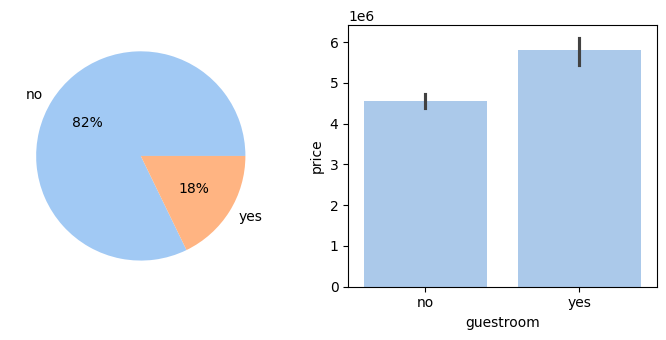

In [18]:
fig, ax = fig, ax = plt.subplots(1,2)
guestroom_count = cleaned_house_price['guestroom'].value_counts()
guestroom_labels = guestroom_count.index
ax[0].pie(guestroom_count, labels=guestroom_labels, autopct='%0.0f%%')
sns.barplot(cleaned_house_price, x='guestroom', y='price', ax=ax[1])
plt.show()

此数据集中的房子大多数没有客人房。  

并且有客人房的房子的均价比没有客人房的房子的均价高。

### 是否有地下室与房价的关系

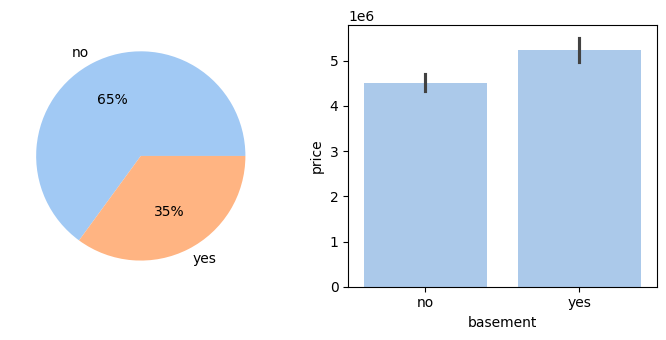

In [19]:
fig, ax = fig, ax = plt.subplots(1,2)
basement_count = cleaned_house_price['basement'].value_counts()
basement_labels = basement_count.index
ax[0].pie(basement_count, labels=basement_labels, autopct='%0.0f%%')
sns.barplot(cleaned_house_price, x='basement', y='price', ax=ax[1])
plt.show()

此数据集中的房子大多数没有地下室。  

并且有地下室的房子的均价比没有地下室的房子的均价高。

### 是否有热水器与房价的关系

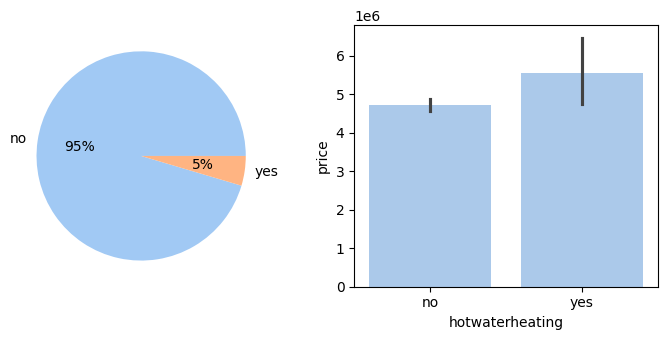

In [20]:
fig, ax = plt.subplots(1,2)
hotwaterheating_count =  cleaned_house_price['hotwaterheating'].value_counts()
hotwaterheating_labels = hotwaterheating_count.index
ax[0].pie(hotwaterheating_count, labels=hotwaterheating_labels, autopct='%0.0f%%')
sns.barplot(cleaned_house_price, x='hotwaterheating', y='price', ax=ax[1])
plt.show()

此数据集中的房子里有95%都有热水器。  

并且有热水器的房子的均价比没有热水器的房子的均价高。

### 是否有空调与房价的关系

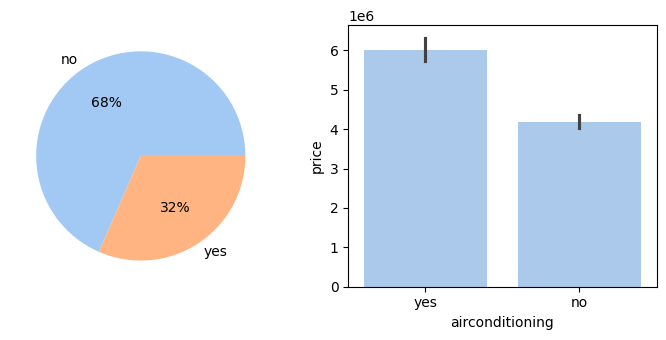

In [21]:
fig, ax = plt.subplots(1,2)
airconditioning_count =  cleaned_house_price['airconditioning'].value_counts()
airconditioning_labels = airconditioning_count.index
ax[0].pie(airconditioning_count, labels=airconditioning_labels, autopct='%0.0f%%')
sns.barplot(cleaned_house_price, x='airconditioning', y='price', ax=ax[1])
plt.show()

此数据集中的房子里有68%都有空调。  

并且有空调的房子的均价比没有空调的房子的均价高。

### 是否位于城区首选社区与房价的关系

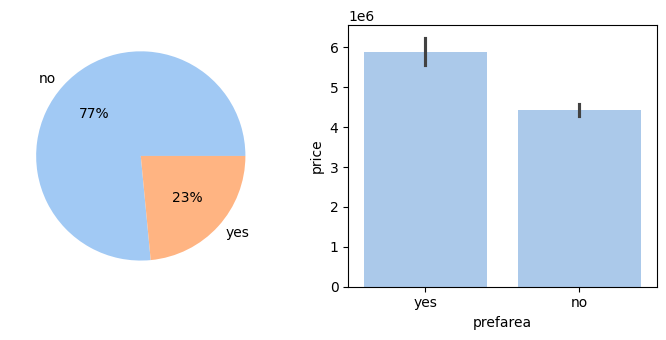

In [22]:
fig, ax = plt.subplots(1,2)
prefarea_count =  cleaned_house_price['prefarea'].value_counts()
prefarea_labels = prefarea_count.index
ax[0].pie(prefarea_count, labels=prefarea_labels, autopct='%0.0f%%')
sns.barplot(cleaned_house_price, x='prefarea', y='price', ax=ax[1])
plt.show()

此数据集中的房子大多数都不位于城市首选社区。  

并且位于城市首选社区的房子的均价比不位于城市首选社区的房子的均价高。

### 装修状态与房价的关系

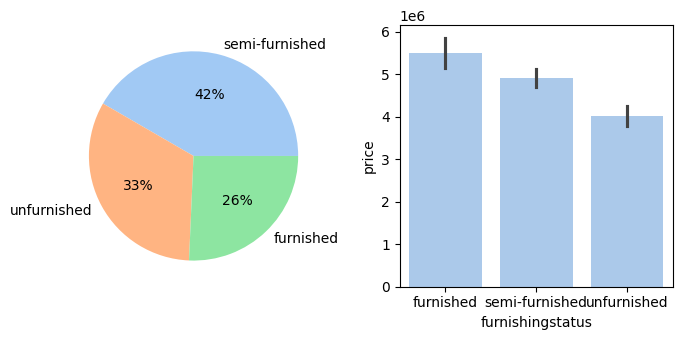

In [23]:
fig, ax = plt.subplots(1,2)
furnishingstatus_count =  cleaned_house_price['furnishingstatus'].value_counts()
furnishingstatus_labels = furnishingstatus_count.index
ax[0].pie(furnishingstatus_count, labels=furnishingstatus_labels, autopct='%0.0f%%')
sns.barplot(cleaned_house_price, x='furnishingstatus', y='price', ax=ax[1])
plt.show()

此数据集中的房子有33%是没装修，有42%是办装修，有26%是已装修。  

可以看出装修程度越高，房子均价越高。

## 分析数据

在分析步骤中，我们将利用`cleaned_house_price`的数据，进行线性回归分析，目标得到一个可以根据房子的各个属性预测房价的数学模型。  

先引入所需要的模块。

In [24]:
import statsmodels.api as sm

因为进行预测时不希望改变原来Dataframe的结构，因此重新创建一个新的Dataframe来进行线性回归分析。

In [25]:
lr_house_price = cleaned_house_price.copy()
lr_house_price

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


由于存在分类变量，无法直接建立线性回归模型，因此需要引入虚拟变量，也就是用0-1表示分类变量。

In [26]:
lr_house_price = pd.get_dummies(lr_house_price, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea',
                                       'furnishingstatus'], dtype=int, drop_first=True)
lr_house_price

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


接下来就是要划分自变量和因变量。  

因变量是`price`,因为我们进行线性回归的目的是得到一个能根据房子各个属性预测价格的数学模型。

In [27]:
y = lr_house_price['price']

In [28]:
X = lr_house_price.drop(['price'], axis=1)

在进行线性分析之前，我们需要对自变量进行相关性分析，如果有两个变量相关性过大的话会导致共线性问题，从而影响线性回归分析。

In [29]:
X.corr()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
area,1.000000,0.151858,0.193820,0.083996,0.352980,0.288874,0.140297,0.047417,-0.009229,0.222393,0.234779,0.006156,-0.142278
bedrooms,0.151858,1.000000,0.373930,0.408564,0.139270,-0.012033,0.080549,0.097312,0.046049,0.160603,0.079023,0.050040,-0.126252
bathrooms,0.193820,0.373930,1.000000,0.326165,0.177496,0.042398,0.126469,0.102106,0.067159,0.186915,0.063472,0.029834,-0.132107
stories,0.083996,0.408564,0.326165,1.000000,0.045547,0.121706,0.043538,-0.172394,0.018847,0.293602,0.044425,-0.003648,-0.082972
parking,0.352980,0.139270,0.177496,0.045547,1.000000,0.204433,0.037466,0.051497,0.067864,0.159173,0.091627,0.041327,-0.165705
mainroad_yes,0.288874,-0.012033,0.042398,0.121706,0.204433,1.000000,0.092337,0.044002,-0.011781,0.105423,0.199876,0.011450,-0.133123
guestroom_yes,0.140297,0.080549,0.126469,0.043538,0.037466,0.092337,1.000000,0.372066,-0.010308,0.138179,0.160897,0.005821,-0.099023
basement_yes,0.047417,0.097312,0.102106,-0.172394,0.051497,0.044002,0.372066,1.000000,0.004385,0.047341,0.228083,0.050284,-0.117935
hotwaterheating_yes,-0.009229,0.046049,0.067159,0.018847,0.067864,-0.011781,-0.010308,0.004385,1.000000,-0.130023,-0.059411,0.063819,-0.059194
airconditioning_yes,0.222393,0.160603,0.186915,0.293602,0.159173,0.105423,0.138179,0.047341,-0.130023,1.000000,0.117382,-0.053179,-0.094086


In [30]:
X.corr().abs() > 0.8

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
area,True,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False
stories,False,False,False,True,False,False,False,False,False,False,False,False,False
parking,False,False,False,False,True,False,False,False,False,False,False,False,False
mainroad_yes,False,False,False,False,False,True,False,False,False,False,False,False,False
guestroom_yes,False,False,False,False,False,False,True,False,False,False,False,False,False
basement_yes,False,False,False,False,False,False,False,True,False,False,False,False,False
hotwaterheating_yes,False,False,False,False,False,False,False,False,True,False,False,False,False
airconditioning_yes,False,False,False,False,False,False,False,False,False,True,False,False,False


根据观察可以发现，各个自变量相关性系数的绝对值都小于0.8。

接下来，给模型的线性方程添加截距。

In [31]:
X = sm.add_constant(X)
X

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,1.0,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,1.0,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,1.0,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,1.0,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.0,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1.0,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1.0,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1.0,2910,3,1,1,0,0,0,0,0,0,0,0,0


下一步可以调用OLS函数，通过最小二乘法得到各个自变量的参数。

In [32]:
model = sm.OLS(y, X).fit()

用summary方法对结果进行汇总展示。

In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Thu, 12 Dec 2024   Prob (F-statistic):          9.07e-123
Time:                        18:28:59   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.277e+04   2.64e+05      0.162      0.872   -4.76e+05    5.62e+05
area                              244.1394     24.289     10.052      0.000     196.425     291.853
bedrooms                         1.148e+05   7.26e+04      1.581      0.114   -2.78e+04    2.57e+05
bathrooms                        9.877e+05   1.03e+05      9.555      0.000    7.85e+05    1.19e+06
stories                          4.508e+05   6.42e+04      7.026      0.000    3.25e+05    5.77e+05
parking                          2.771e+05   5.85e+04      4.735      0.000    1.62e+05    3.92e+05
mainroad_yes                     4.213e+05   1.42e+05      2.962      0.003    1.42e+05    7.01e+05
guestroom_yes                    3.005e+05   1.32e+05      2.282      0.023    4.18e+04    5.59e+05
basement_yes                     3.501e+05    1.1e+05      3.175      0.002    1.33e+05    5.67e+05
hotwaterheating_yes              8.554e+05   2.23e+05      3.833      0.000    4.17e+05    1.29e+06
airconditioning_yes               8.65e+05   1.08e+05      7.983      0.000    6.52e+05    1.08e+06
prefarea_yes                     6.515e+05   1.16e+05      5.632      0.000    4.24e+05    8.79e+05
furnishingstatus_semi-furnished -4.634e+04   1.17e+05     -0.398      0.691   -2.75e+05    1.83e+05
furnishingstatus_unfurnished    -4.112e+05   1.26e+05     -3.258      0.001   -6.59e+05   -1.63e+05
==============================================================================
Omnibus:                       97.909   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.281
Skew:                           0.895   Prob(JB):                     8.22e-57
Kurtosis:                       5.859   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

当我们把显著区间设定为0.05时，以上结果的P值可以看出，模型认为以下因素对房屋价格没有显著性影响：卧室数、是否为简装房。此外，常数（表示线性方程的截距）的P值也很大，说明也没有显著影响。  

可以把这些变量移除后，再次建立线性回归模型。

In [34]:
X = X.drop(["const", "bedrooms", "furnishingstatus_semi-furnished"], axis=1)
X

,area,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_unfurnished
0,7420,2,3,2,1,0,0,0,1,1,0
1,8960,4,4,3,1,0,0,0,1,0,0
2,9960,2,2,2,1,0,1,0,0,1,0
3,7500,2,2,3,1,0,1,0,1,1,0
4,7420,1,2,2,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
540,3000,1,1,2,1,0,1,0,0,0,1
541,2400,1,1,0,0,0,0,0,0,0,0
542,3620,1,1,0,1,0,0,0,0,0,1
543,2910,1,1,0,0,0,0,0,0,0,0


In [35]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1088.
Date:                Thu, 12 Dec 2024   Prob (F-statistic):                        0.00
Time:                        18:28:59   Log-Likelihood:                         -8333.5
No. Observations:                 545   AIC:                                  1.669e+04
Df Residuals:                     534   BIC:                                  1.674e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
area                           257.5854     22.577     11.409      0.000     213.234     301.936
bathrooms                     1.071e+06   9.27e+04     11.553      0.000    8.89e+05    1.25e+06
stories                       5.084e+05   5.71e+04      8.898      0.000    3.96e+05    6.21e+05
parking                       2.793e+05   5.83e+04      4.794      0.000    1.65e+05    3.94e+05
mainroad_yes                  4.672e+05   1.27e+05      3.679      0.000    2.18e+05    7.17e+05
guestroom_yes                 2.851e+05   1.31e+05      2.172      0.030    2.72e+04    5.43e+05
basement_yes                  4.016e+05   1.07e+05      3.765      0.000    1.92e+05    6.11e+05
hotwaterheating_yes           8.668e+05   2.23e+05      3.884      0.000    4.28e+05    1.31e+06
airconditioning_yes           8.543e+05   1.07e+05      7.952      0.000    6.43e+05    1.07e+06
prefarea_yes                  6.443e+05   1.15e+05      5.594      0.000    4.18e+05    8.71e+05
furnishingstatus_unfurnished -3.493e+05   9.49e+04     -3.679      0.000   -5.36e+05   -1.63e+05
==============================================================================
Omnibus:                       94.840   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.889
Skew:                           0.865   Prob(JB):                     2.01e-55
Kurtosis:                       5.845   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

可以看到，当我们把P值较大的自变量从线性回归模型中移除后，R方的值从0.682增长到了0.957，提高了模型对现有数据的拟合度。  

根据各个自变量在线性回归方程中的系数来看，模型预测以下因素的增加（或存在）会显著增加房屋价格：房屋面积、厕所数、楼层数、车库容量、位于主路、有客房、有地下室、有热水器、有空调、位于城市首选社区。  

线性回归模型预测以下因素的增加（或存在）会显著降低房屋价格：房屋未经装修，为毛坯房。


In [36]:
# 要预测房价的房屋信息：
# 面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。
price_to_predict = pd.DataFrame({"area":[6500], "bedroooms":[4], "bathrooms":[2], "stories":[2], "mainroad":['no'], "guestroom":['no'],
                   "basement":['yes'], "hotwaterheating":['yes'], "airconditioning":['no'], "parking":2, "prefarea":['yes'],
                   "furnishingstatus":['semi-furnished']})

price_to_predict

,area,bedroooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,6500,4,2,2,no,no,yes,yes,no,2,yes,semi-furnished


我们需要把分类变量的类型转换为`Category`，并且通过`categories`参数，让程序知道所有可能的分类值。  

这样做的原因是，预测数据包含的分类可能不全。我们需要确保引入虚拟变量的时候，不会漏掉某个或某些分类。


In [37]:
price_to_predict['mainroad'] = pd.Categorical(price_to_predict['mainroad'], categories=['yes', 'no'])
price_to_predict['guestroom'] = pd.Categorical(price_to_predict['guestroom'], categories=['yes', 'no'])
price_to_predict['hotwaterheating'] = pd.Categorical(price_to_predict['hotwaterheating'], categories=['yes', 'no'])
price_to_predict['airconditioning'] = pd.Categorical(price_to_predict['airconditioning'], categories=['yes', 'no'])
price_to_predict['basement'] = pd.Categorical(price_to_predict['basement'], categories=['yes', 'no'])
price_to_predict['prefarea'] = pd.Categorical(price_to_predict['prefarea'], categories=['yes', 'no'])
price_to_predict['furnishingstatus'] = pd.Categorical(price_to_predict['furnishingstatus'], categories=['furnished', 'semi-furnished', 'unfurnished'])

In [38]:
price_to_predict = pd.get_dummies(price_to_predict, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea',
                                       'furnishingstatus'], dtype=int, drop_first=True)
price_to_predict

,area,bedroooms,bathrooms,stories,parking,mainroad_no,guestroom_no,basement_no,hotwaterheating_no,airconditioning_no,prefarea_no,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,6500,4,2,2,2,1,1,0,0,1,0,1,0


In [39]:
price_to_predict = price_to_predict.drop(['bedroooms', 'furnishingstatus_semi-furnished'], axis=1)
price_to_predict

,area,bathrooms,stories,parking,mainroad_no,guestroom_no,basement_no,hotwaterheating_no,airconditioning_no,prefarea_no,furnishingstatus_unfurnished
0,6500,2,2,2,1,1,0,0,1,0,0


接下来就可以调用线性回归模型的`predict`方法，获得预测价格。

In [40]:
predict_value = model.predict(price_to_predict)
predict_value

0    6.997695e+06
dtype: float64

线性回归模型预测的价格为：697695